<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_6_2_Clustering1_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


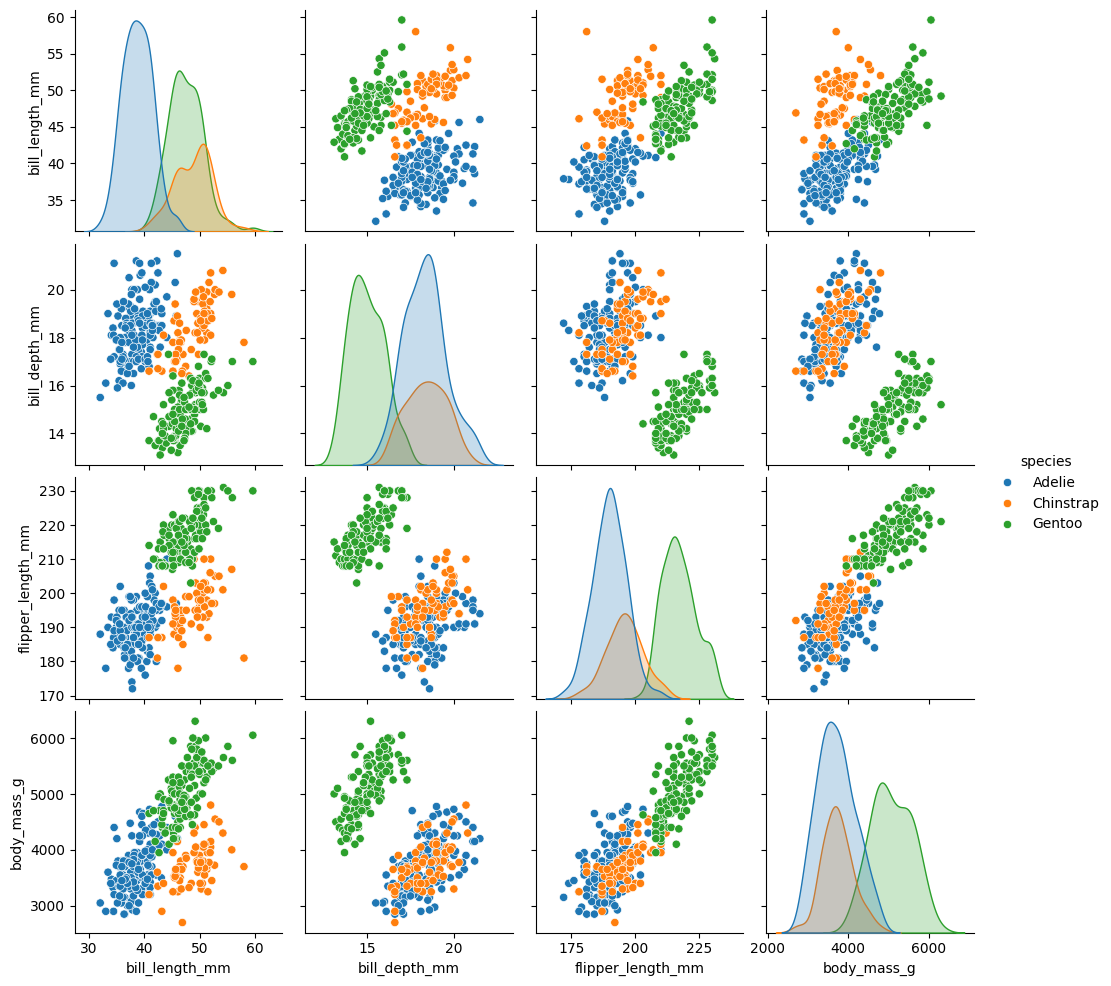

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


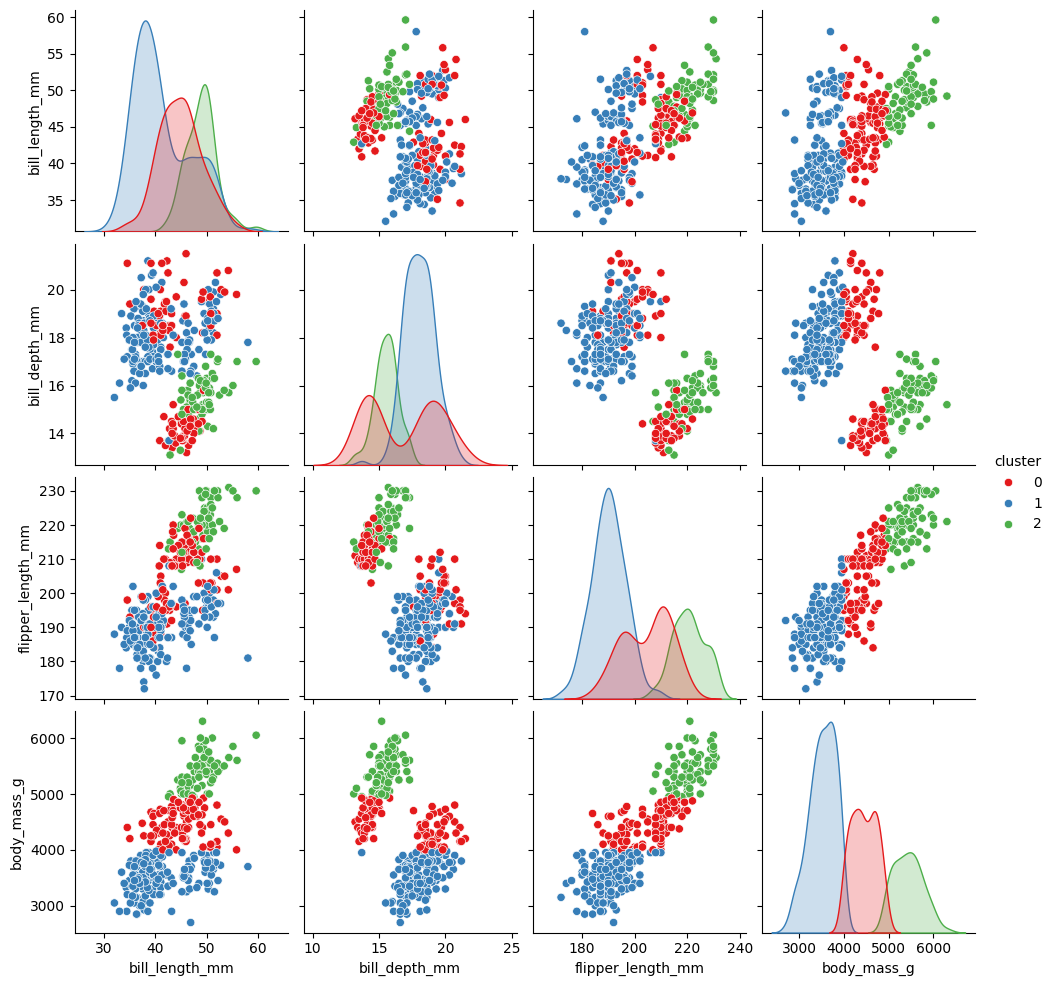

Однородность : 0.400588423922462
Полнота : 0.4052070636873124
Оценка V-меры: 0.4028845072990955


In [17]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
# Выбор числовых атрибутов для кластеризации
numeric_attributes = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# Выбор количества кластеров
k = 3
# Применение K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
penguins['cluster'] = kmeans.fit_predict(numeric_attributes)
# Визуализация результатов кластеризации
sns.pairplot(data=penguins, hue='cluster', palette='Set1')
plt.show()
# Оценка качества кластеризации
homogeneity = homogeneity_score(penguins['species'], penguins['cluster'])
completeness = completeness_score(penguins['species'], penguins['cluster'])
v_measure = v_measure_score(penguins['species'], penguins['cluster'])
print("Однородность :", homogeneity)
print("Полнота :", completeness)
print("Оценка V-меры:", v_measure)


**Общее значение каждой метрики около 0.40, что означает, что кластеры достаточно хорошо соответствуют истинным меткам классов**

In [5]:
df = penguins.drop(['species', 'island', 'sex'], axis=1)
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

**метод локтя**

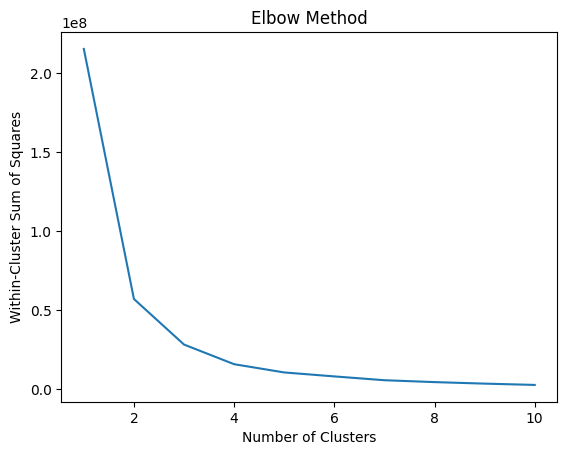

In [8]:
# Plot the within-cluster sum of squares
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [9]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

In [10]:
list_pred_y = list(pred_y)
list_pred_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [11]:
pred_y.size
df["cluster"] = pred_y

In [12]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,1


In [13]:
# Print the cluster centers
print(kmeans.cluster_centers_)

[[-1.04680889  0.48662566 -0.88169491 -0.7627539 ]
 [ 0.65475809 -1.10270671  1.16246305  1.10121078]
 [ 0.67202511  0.80526339 -0.28934658 -0.38410387]]


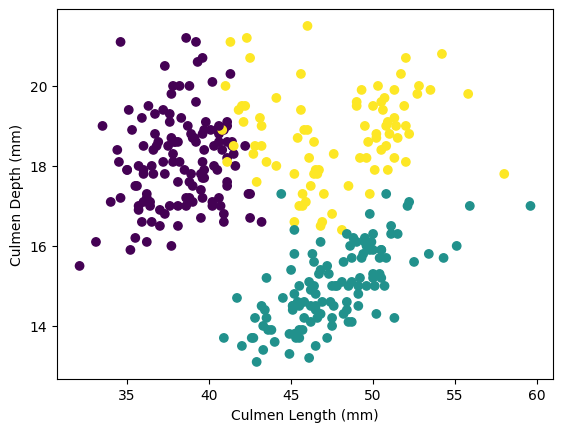

In [14]:
# Plot the clusters
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=pred_y, cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

**Точки из разных кластеров иногда попадают в один кластер**